#📌 Extracción

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path

BASE_PATH = Path("/content/drive/MyDrive/Alura/Telecom_X_Challenge")
DATA_RAW = BASE_PATH / "data" / "raw"
DATA_PROCESSED = BASE_PATH / "data" / "processed"

BASE_PATH, DATA_RAW, DATA_PROCESSED

(PosixPath('/content/drive/MyDrive/Alura/Telecom_X_Challenge'),
 PosixPath('/content/drive/MyDrive/Alura/Telecom_X_Challenge/data/raw'),
 PosixPath('/content/drive/MyDrive/Alura/Telecom_X_Challenge/data/processed'))

In [ ]:
# Crear estructura de carpetas si no existe
DATA_RAW.mkdir(parents=True, exist_ok=True)
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)

print("Estructura de carpetas creada:")
print(DATA_RAW)
print(DATA_PROCESSED)

Estructura de carpetas creada:
/content/drive/MyDrive/Alura/Telecom_X_Challenge/data/raw
/content/drive/MyDrive/Alura/Telecom_X_Challenge/data/processed


In [ ]:
import os

os.listdir("/content/drive/MyDrive/Alura/Telecom_X_Challenge/data/raw")

['TelecomX_Data.json']

In [ ]:
import json
import pandas as pd
from pathlib import Path

DATA_RAW = Path("/content/drive/MyDrive/Alura/Telecom_X_Challenge/data/raw")
json_path = DATA_RAW / "TelecomX_Data.json"

with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

print(f"Total de registros cargados: {len(data)}")
type(data)

Total de registros cargados: 7267


list

In [ ]:
df = pd.json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df.shape

(7267, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [ ]:
df["account.Charges.Total"].head(10)

,account.Charges.Total
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4
5,571.45
6,7904.25
7,5377.8
8,340.35
9,5957.9


In [ ]:
df["Churn"] = df["Churn"].replace(" ", pd.NA)
df["Churn"].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
,224


In [ ]:
# Ver valores únicos tal cual (incluye vacíos, espacios, etc.)
df["Churn"].unique()

array(['No', 'Yes', ''], dtype=object)

In [ ]:
# Ver conteo con representación explícita de strings
df["Churn"].astype(str).map(repr).value_counts()

,count
Churn,
'No',5174
'Yes',1869
'',224


In [ ]:
# 1) Convertir a string, 2) quitar espacios alrededor, 3) convertir '' a NA
df["Churn"] = df["Churn"].astype(str).str.strip().replace({"": pd.NA, "nan": pd.NA})

df["Churn"].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
<NA>,224


In [ ]:
df = df.dropna(subset=["Churn"])
df["Churn"].value_counts()
df.shape

(7043, 21)

#🔧 Transformación

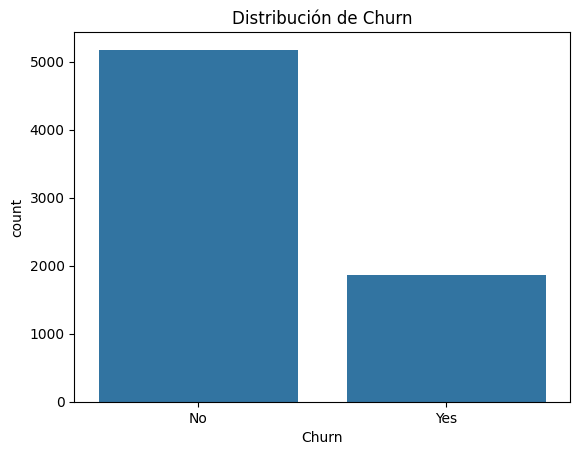

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de churn
sns.countplot(data=df, x="Churn")
plt.title("Distribución de Churn")
plt.show()

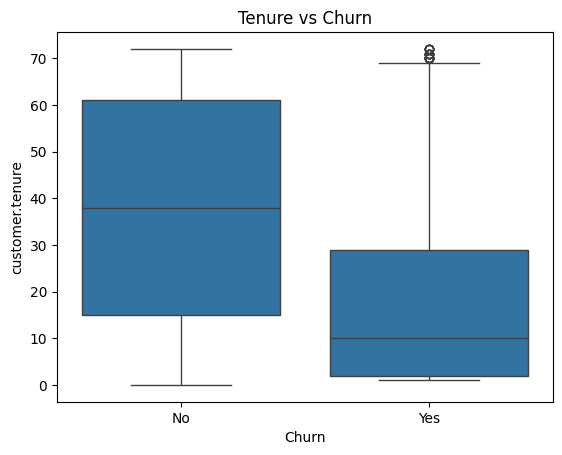

In [ ]:
sns.boxplot(data=df, x="Churn", y="customer.tenure")
plt.title("Tenure vs Churn")
plt.show()

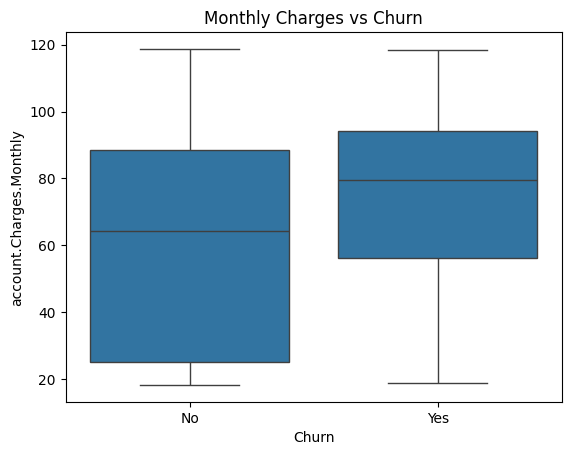

In [ ]:
sns.boxplot(data=df, x="Churn", y="account.Charges.Monthly")
plt.title("Monthly Charges vs Churn")
plt.show()

In [ ]:
categorical_cols = [
    "customer.gender",
    "customer.Partner",
    "customer.Dependents",
    "phone.PhoneService",
    "internet.InternetService",
    "account.Contract",
    "account.PaymentMethod"
]

for col in categorical_cols:
    print(f"\n{col}")
    print(df[col].value_counts())


customer.gender
customer.gender
Male      3555
Female    3488
Name: count, dtype: int64

customer.Partner
customer.Partner
No     3641
Yes    3402
Name: count, dtype: int64

customer.Dependents
customer.Dependents
No     4933
Yes    2110
Name: count, dtype: int64

phone.PhoneService
phone.PhoneService
Yes    6361
No      682
Name: count, dtype: int64

internet.InternetService
internet.InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

account.Contract
account.Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

account.PaymentMethod
account.PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


In [ ]:
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

In [ ]:
pd.crosstab(df["account.Contract"], df["Churn"], normalize="index")

Churn,No,Yes
account.Contract,,
month-to-month,0.572903,0.427097
one year,0.887305,0.112695
two year,0.971681,0.028319


In [ ]:
pd.crosstab(df["internet.InternetService"], df["Churn"], normalize="index")

Churn,No,Yes
internet.InternetService,,
dsl,0.810409,0.189591
fiber optic,0.581072,0.418928
no,0.925950,0.074050


In [ ]:
pd.crosstab(df["phone.PhoneService"], df["Churn"], normalize="index")

Churn,No,Yes
phone.PhoneService,,
no,0.750733,0.249267
yes,0.732904,0.267096


In [ ]:
pd.crosstab(df["customer.Partner"], df["Churn"], normalize="index")

Churn,No,Yes
customer.Partner,,
no,0.670420,0.329580
yes,0.803351,0.196649


In [ ]:
pd.crosstab(df["customer.Dependents"], df["Churn"], normalize="index")

Churn,No,Yes
customer.Dependents,,
no,0.687209,0.312791
yes,0.845498,0.154502


In [ ]:
pd.crosstab(df["account.PaymentMethod"], df["Churn"], normalize="index")

Churn,No,Yes
account.PaymentMethod,,
bank transfer (automatic),0.832902,0.167098
credit card (automatic),0.847569,0.152431
electronic check,0.547146,0.452854
mailed check,0.808933,0.191067


In [ ]:
# 1. Crear copias RAW (muy importante)
df["customer.Partner_raw"] = df["customer.Partner"]
df["customer.Dependents_raw"] = df["customer.Dependents"]
df["phone.PhoneService_raw"] = df["phone.PhoneService"]

In [ ]:
binary_map = {"yes": 1, "no": 0}

df["customer.Partner_bin"] = df["customer.Partner_raw"].map(binary_map)
df["customer.Dependents_bin"] = df["customer.Dependents_raw"].map(binary_map)
df["phone.PhoneService_bin"] = df["phone.PhoneService_raw"].map(binary_map)

In [ ]:
df[[
    "customer.Partner_raw","customer.Partner_bin",
    "customer.Dependents_raw","customer.Dependents_bin",
    "phone.PhoneService_raw","phone.PhoneService_bin"
]].head()

,customer.Partner_raw,customer.Partner_bin,customer.Dependents_raw,customer.Dependents_bin,phone.PhoneService_raw,phone.PhoneService_bin
0,yes,1,yes,1,yes,1
1,no,0,no,0,yes,1
2,no,0,no,0,yes,1
3,yes,1,no,0,yes,1
4,yes,1,no,0,yes,1


In [ ]:
sorted(df.columns)

['Churn',
 'account.Charges.Monthly',
 'account.Charges.Total',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'customer.Dependents',
 'customer.Dependents_bin',
 'customer.Dependents_raw',
 'customer.Partner',
 'customer.Partner_bin',
 'customer.Partner_raw',
 'customer.SeniorCitizen',
 'customer.gender',
 'customer.tenure',
 'customerID',
 'internet.DeviceProtection',
 'internet.InternetService',
 'internet.OnlineBackup',
 'internet.OnlineSecurity',
 'internet.StreamingMovies',
 'internet.StreamingTV',
 'internet.TechSupport',
 'phone.MultipleLines',
 'phone.PhoneService',
 'phone.PhoneService_bin',
 'phone.PhoneService_raw']

In [ ]:
contract_map = {"month-to-month": 0, "one year": 1, "two year": 2}

df["account.Contract_num"] = (
    df["account.Contract"]
    .astype(str).str.strip().str.lower()
    .map(contract_map)
)

df["account.Contract_num"].value_counts(dropna=False)

,count
account.Contract_num,
0,3875
2,1695
1,1473


In [ ]:
df = pd.get_dummies(
    df,
    columns=["internet.InternetService"],
    prefix="internet",
    drop_first=True
)

df = pd.get_dummies(
    df,
    columns=["account.PaymentMethod"],
    prefix="payment",
    drop_first=True
)

In [ ]:
[c for c in df.columns if c.startswith("internet_")]
[c for c in df.columns if c.startswith("payment_")]

['payment_credit card (automatic)',
 'payment_electronic check',
 'payment_mailed check']

In [ ]:
df["tenure_group"] = pd.cut(
    df["customer.tenure"],
    bins=[0, 12, 24, 48, 100],
    labels=["0-12", "12-24", "24-48", "48+"]
)

df["tenure_group"].value_counts(dropna=False)

,count
tenure_group,
48+,2239
0-12,2175
24-48,1594
12-24,1024
NaN,11


In [ ]:
median_charge = df["account.Charges.Monthly"].median()
df["high_charges"] = (df["account.Charges.Monthly"] > median_charge).astype(int)

df["high_charges"].value_counts()

,count
high_charges,
0,3528
1,3515


In [ ]:
df["Churn_bin"] = df["Churn"].astype(str).str.strip().str.lower().map({"yes": 1, "no": 0})
df["Churn_bin"].value_counts(dropna=False)

,count
Churn_bin,
0,5174
1,1869


In [ ]:
[c for c in df.columns if c.startswith("internet_")]
[c for c in df.columns if c.startswith("payment_")]
sorted(df.columns)

['Churn',
 'Churn_bin',
 'account.Charges.Monthly',
 'account.Charges.Total',
 'account.Contract',
 'account.Contract_num',
 'account.PaperlessBilling',
 'customer.Dependents',
 'customer.Dependents_bin',
 'customer.Dependents_raw',
 'customer.Partner',
 'customer.Partner_bin',
 'customer.Partner_raw',
 'customer.SeniorCitizen',
 'customer.gender',
 'customer.tenure',
 'customerID',
 'high_charges',
 'internet.DeviceProtection',
 'internet.OnlineBackup',
 'internet.OnlineSecurity',
 'internet.StreamingMovies',
 'internet.StreamingTV',
 'internet.TechSupport',
 'internet_fiber optic',
 'internet_no',
 'payment_credit card (automatic)',
 'payment_electronic check',
 'payment_mailed check',
 'phone.MultipleLines',
 'phone.PhoneService',
 'phone.PhoneService_bin',
 'phone.PhoneService_raw',
 'tenure_group']

In [ ]:
df["account.Charges.Total"] = pd.to_numeric(
    df["account.Charges.Total"],
    errors="coerce"
)

In [ ]:
df["daily_charges"] = df["account.Charges.Total"] / df["customer.tenure"]

In [ ]:
import numpy as np
df["daily_charges"] = df["daily_charges"].replace([np.inf, -np.inf], np.nan)

#📊 Carga y análisis

In [ ]:
df["daily_charges"].describe()

,daily_charges
count,7032.000000
mean,64.799424
std,30.185891
min,13.775000
25%,36.179891
50%,70.373239
75%,90.179560
max,121.400000


In [ ]:
df[["daily_charges", "Churn"]].groupby("Churn").mean()

,daily_charges
Churn,
No,61.312024
Yes,74.433154


In [ ]:
features = [
    "customer.tenure",
    "daily_charges",
    "high_charges",
    "account.Contract_num",
    "internet_fiber optic",
    "payment_electronic check",
    "customer.Partner_bin",
    "customer.Dependents_bin"
]

X = df[features]
y = df["Churn_bin"]

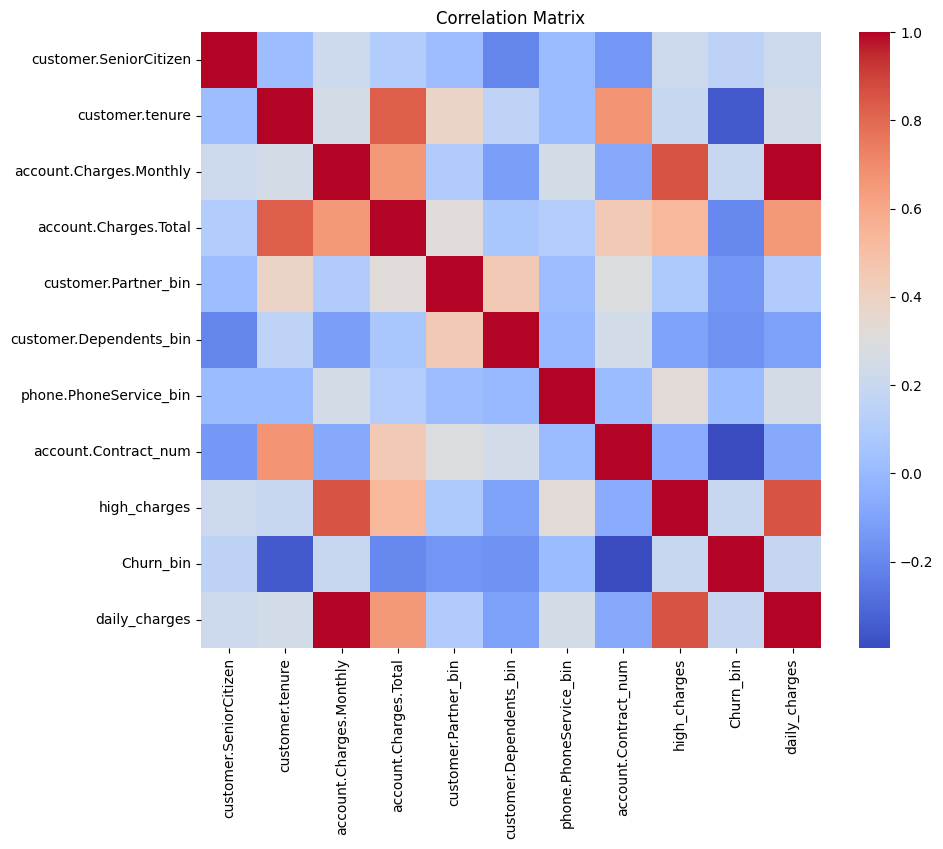

In [ ]:
corr = df.select_dtypes(include=["int64", "float64"]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
corr_with_churn = (
    num_df.corr()["Churn_bin"]
    .sort_values(ascending=False)
)

corr_with_churn

,Churn_bin
Churn_bin,1.000000
high_charges,0.195663
account.Charges.Monthly,0.193356
daily_charges,0.192033
customer.SeniorCitizen,0.150889
phone.PhoneService_bin,0.011942
customer.Partner_bin,-0.150448
customer.Dependents_bin,-0.164221
account.Charges.Total,-0.199484
customer.tenure,-0.352229


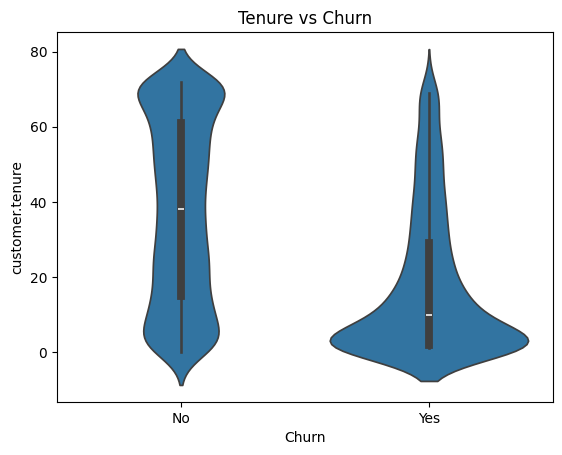

In [ ]:
sns.violinplot(data=df, x="Churn", y="customer.tenure")
plt.title("Tenure vs Churn")
plt.show()

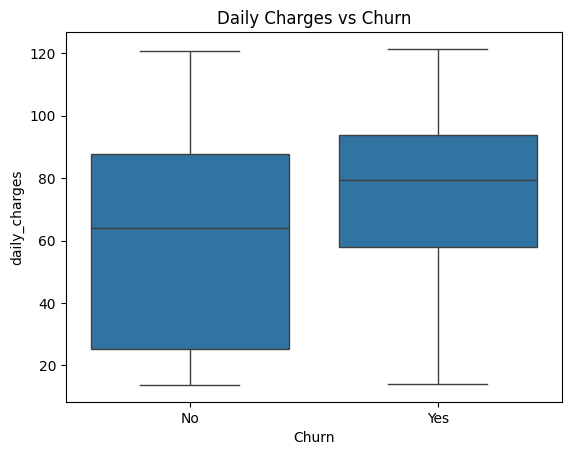

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="Churn", y="daily_charges")
plt.title("Daily Charges vs Churn")
plt.show()

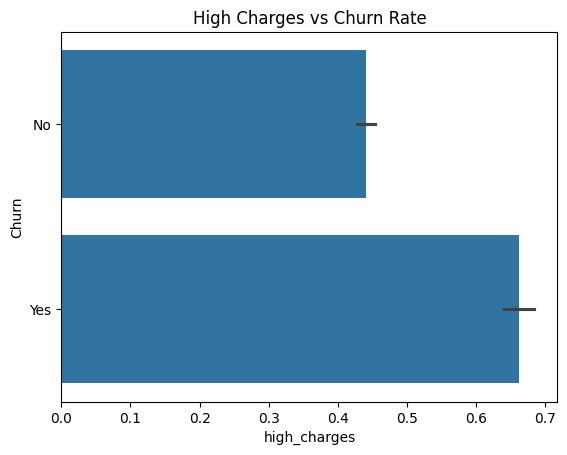

In [ ]:
sns.barplot(x="high_charges", y="Churn", data=df)
plt.title("High Charges vs Churn Rate")
plt.show()

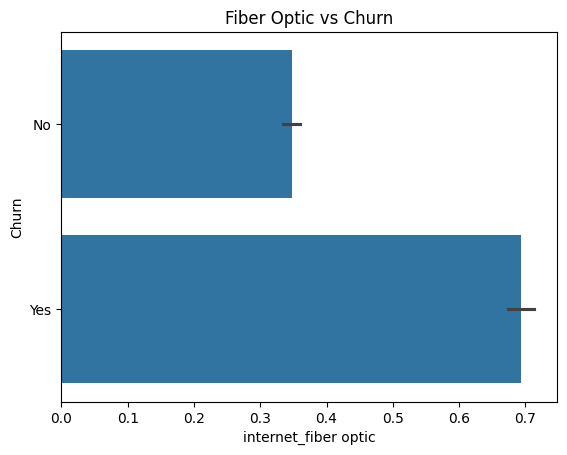

In [ ]:
sns.barplot(x="internet_fiber optic", y="Churn", data=df)
plt.title("Fiber Optic vs Churn")
plt.show()

In [ ]:
features = [
    "customer.tenure",
    "daily_charges",
    "high_charges",
    "account.Contract_num",
    "internet_fiber optic",
    "payment_electronic check",
    "customer.Partner_bin",
    "customer.Dependents_bin"
]

X = df[features]
y = df["Churn_bin"]

X.isna().sum().sort_values(ascending=False)

,0
daily_charges,11
customer.tenure,0
high_charges,0
account.Contract_num,0
internet_fiber optic,0
payment_electronic check,0
customer.Partner_bin,0
customer.Dependents_bin,0


In [ ]:
X = X.dropna()
y = y.loc[X.index]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.63      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



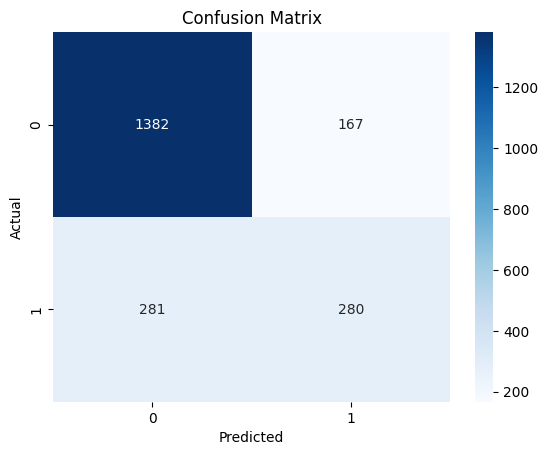

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
coef_df = (
    pd.DataFrame({
        "feature": X.columns,
        "coefficient": model.coef_[0]
    })
    .sort_values(by="coefficient", ascending=False)
)

coef_df

,feature,coefficient
4,internet_fiber optic,0.863818
5,payment_electronic check,0.578605
1,daily_charges,0.017721
0,customer.tenure,-0.031942
6,customer.Partner_bin,-0.045543
7,customer.Dependents_bin,-0.209451
2,high_charges,-0.368832
3,account.Contract_num,-0.795889


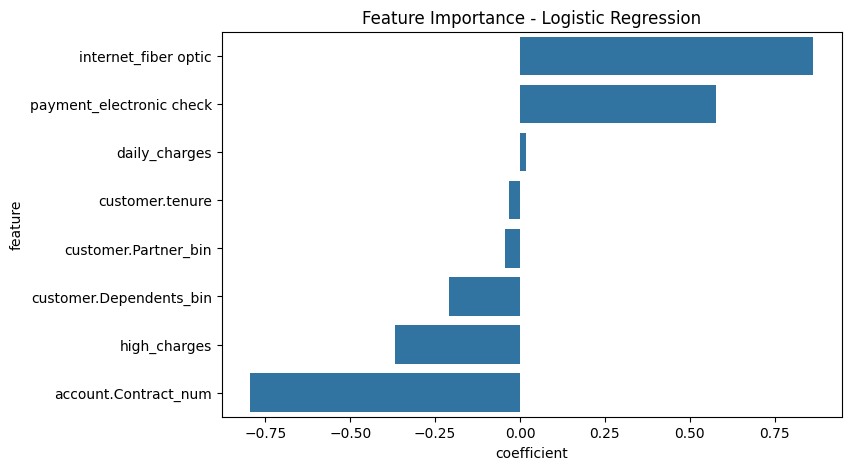

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    x="coefficient",
    y="feature",
    data=coef_df
)
plt.title("Feature Importance - Logistic Regression")
plt.show()

#📄Informe final

#📌 Conclusiones clave

El churn está fuertemente influenciado por el tipo de contrato y servicio, no solo por el precio.

Los clientes con contratos mensuales, fibra óptica y pagos electrónicos presentan mayor riesgo.

Clientes con relaciones más estables (dependientes, pareja, mayor tenure) muestran menor probabilidad de abandono.

El cargo mensual por sí solo no explica el churn.

El modelo logra una precisión aceptable (79%) y detecta patrones reales de comportamiento.

#📊 Recomendaciones estratégicas
##Corto plazo

Incentivar migración de month-to-month → contratos largos.

Revisar experiencia y pricing de fibra óptica.

Incentivar métodos de pago automáticos (tarjeta / débito).

##Mediano plazo

Modelos más avanzados:

Gradient Boosting / XGBoost

Árboles con interpretación SHAP

Segmentar campañas por riesgo estimado.

##Largo plazo

Implementar scoring mensual de churn.

Integrar alertas tempranas.

Usar este modelo como base para modelos prescriptivos.